# 15.3 Derivació i Integració amb simpy

## 15.3.1 Derivades

`Sympy` permet fer derivació simbòlica de funcions (_differentiation_ en anglès) mitjançant la funció **`.diff(`**`exp`**`,`**`var`**`)`**, que, en la seva forma més bàsica, rep com a arguments:

  * una `exp`ressió simbòlica a derivar i
  * la `var`iable sobre la que derivar.

In [1]:
import sympy as sp
sp.init_printing()
sp.var("x")

print ("Derivant x**2 + 5*x + 1")
sp.diff(x**2 + 5*x + 1, x)

Derivant x**2 + 5*x + 1


In [2]:
print ("Derivant sin(x)*exp(x)")
sp.diff(sp.sin(x)*sp.exp(x),x)

Derivant sin(x)*exp(x)


### 15.3.1.1 Derivades succesives

Si es desitja determinar la derivada d´ordre __$n$-èssim__, només cal cridar a aquesta funció $n$ vegades.

In [3]:
import sympy as sp
sp.init_printing()
sp.var("x")
poli = sp.sympify("x**4+x**3+x**2+x**1+x**0")
poli

In [4]:
print ("1a Derivada")
d1_poli = sp.diff(poli, x)
d1_poli

1a Derivada


In [5]:
print ("2a Derivada")
d2_poli = sp.diff(d1_poli, x)
d2_poli

2a Derivada


In [6]:
print ("4a Derivada")
d3_poli = sp.diff(d2_poli, x)
d4_poli = sp.diff(d3_poli, x)
d4_poli

4a Derivada


O bé, més directament, un paràmetre enter addicional i opcional permet trobar directament una derivada d´ordre $n$:

In [7]:
print ("4a Derivada")
sp.diff(poli, x, 4)

4a Derivada


### 15.3.1.2 Derivades puntuals

Si el que es vol es avaluar la _derivada puntual_ en un valor específic de la variable de derivació, només cal `.subs()`tituir-la després de derivar.



In [8]:
print ("Avaluem la derivada del polinomi en x = 3")
sp.diff(poli, x).subs(x,3)

Avaluem la derivada del polinomi en x = 3


### 15.3.1.3 Derivació respecte múltiples variables

Sovint, necessitareu __funcions de més d'una variable__. En aquest cas, és possible realitzar derivades múltiples sobre diferents variables:


In [9]:
import sympy as sp
sp.init_printing()
sp.var("x")
sp.var("y")
funcio = x**2 * 5*sp.sin(y)
funcio

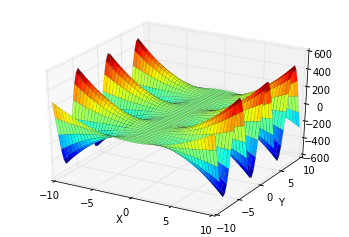

In [12]:
import sympy as sp
sp.plotting.plot3d(funcio, xlabel= 'X',ylabel= 'Y', zlabel= 'Z')

In [10]:
# d(5sin(y)x**2) / dx
sp.diff(funcio,x)

In [11]:
# d(5sin(y)x**2) / dy
sp.diff(funcio,y)

In [13]:
# d2(5sin(y)x**2) / dxdy
sp.diff(sp.diff(funcio,y),x)

### Exercici 15.3.1

___

>  * Sigui un $porc$ volador de massa $m$ que segueix la trajectòria:
>>    $$ X(t) = a + b\cdot t^{3} $$
    $$ Y(t) = c + d\cos(e\cdot t) $$
    $$ a, b, c, d, e > 0 $$

>   * Trobeu l'expressió de la força que l'impulsa en cada instant de temps.
>   * Representeu:
>      1. la trajectòria en el pla X-Y
>      2. la velocitat i la força totals en funció del temps
>    * Considereu que $ a = 1, b = 1, c = 14, d = 10, e = 2, m = 500$, expressats en unitats S.I.

In [25]:
import sympy
sympy.init_printing()

sympy.var("t")
sympy.var("a")
sympy.var("b")
sympy.var("c")
sympy.var("d")
sympy.var("e")

#definim eq trajectoria
x_porc = a + b * t**3
y_porc = c + d * sympy.cos(e*t)
(x_porc,y_porc)

⎛       3                ⎞
⎝a + b⋅t , c + d⋅cos(e⋅t)⎠

In [26]:
#calculem velocitats
vx_porc = x_porc.diff(t)
vy_porc = y_porc.diff(t)
#calculem mòdul de la velocitat
vTOTAL_porc =sympy.sqrt(vx_porc**2 + vy_porc**2)
vx_porc, vy_porc, vTOTAL_porc

⎛                          ___________________________⎞
⎜     2                   ╱    2  4    2  2    2      ⎟
⎝3⋅b⋅t , -d⋅e⋅sin(e⋅t), ╲╱  9⋅b ⋅t  + d ⋅e ⋅sin (e⋅t) ⎠

In [27]:
#calculem acceleracions
ax_porc = vx_porc.diff(t)
ay_porc = vy_porc.diff(t)
ax_porc, ay_porc

⎛           2         ⎞
⎝6⋅b⋅t, -d⋅e ⋅cos(e⋅t)⎠

In [28]:
#apliquem segona llei de Newton
sympy.var("m")
Fx_porc = ax_porc * m
Fy_porc = ay_porc * m
#calculem mòdul de la força
FTOTAL_porc =sympy.sqrt(Fx_porc**2 + Fy_porc**2)
Fx_porc, Fy_porc, FTOTAL_porc

⎛                              __________________________________⎞
⎜             2               ╱     2  2  2    2  4  2    2      ⎟
⎝6⋅b⋅m⋅t, -d⋅e ⋅m⋅cos(e⋅t), ╲╱  36⋅b ⋅m ⋅t  + d ⋅e ⋅m ⋅cos (e⋅t) ⎠

In [30]:
#substituació numèrica
valor_a = 1
valor_b = 1
valor_c = 14
valor_d = 10
valor_e = 2
valor_m = 500


# trajectoria porc, només depen de t
x_porc_num = x_porc.subs(a,valor_a).subs(b,valor_b).subs(c,valor_c).subs(d,valor_d).subs(e,valor_e)
y_porc_num = y_porc.subs(a,valor_a).subs(b,valor_b).subs(c,valor_c).subs(d,valor_d).subs(e,valor_e)

# velocitat total porc, només depèn de t
vTOTAL_porc_num = vTOTAL_porc.subs(a,valor_a).subs(b,valor_b).subs(c,valor_c).subs(d,valor_d).subs(e,valor_e)

# força total porc, només depèn de t
FTOTAL_porc_num = FTOTAL_porc.subs(a,valor_a).subs(b,valor_b).subs(c,valor_c).subs(d,valor_d).subs(e,valor_e).subs(m,valor_m)

x_porc_num, y_porc_num, vTOTAL_porc_num, FTOTAL_porc_num

⎛                             ______________________     _____________________
⎜ 3                          ╱    4          2          ╱          2          
⎝t  + 1, 10⋅cos(2⋅t) + 14, ╲╱  9⋅t  + 400⋅sin (2⋅t) , ╲╱  9000000⋅t  + 4000000

_____________⎞
      2      ⎟
00⋅cos (2⋅t) ⎠

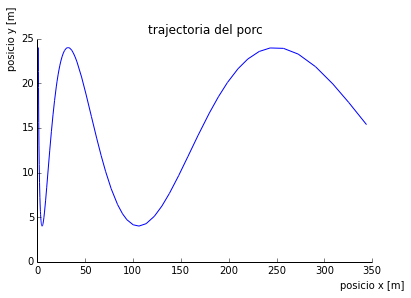

In [31]:
#exemple representació paramètrica 2D
import sympy as sp
sp.plotting.plot_parametric(x_porc_num, y_porc_num, (t,0,7), xlabel = "posicio x [m]",ylabel = "posicio y [m]", title = "trajectoria del porc" )

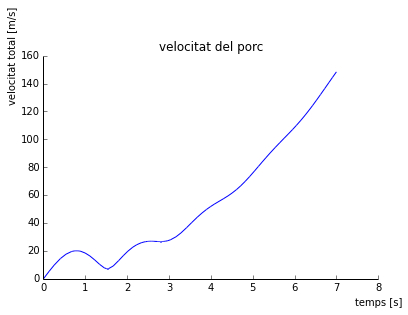

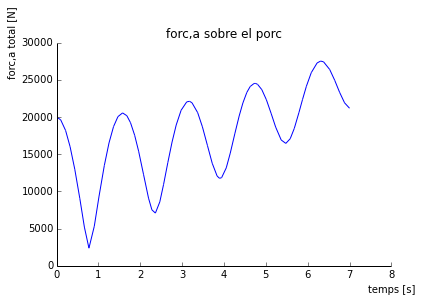

In [32]:
# representació velocitat i força
import sympy as sp
sp.plotting.plot(vTOTAL_porc_num, (t,0,7), xlabel = "temps [s]", ylabel = "velocitat total [m/s]", title = "velocitat del porc" )
sp.plotting.plot(FTOTAL_porc_num, (t,0,7), xlabel = "temps [s]",ylabel = "forc,a total [N]", title = "forc,a sobre el porc" )

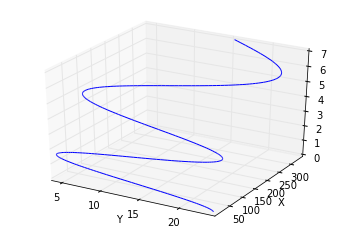

In [33]:
#exemple representació paramètrica 3D
import sympy as sp
sp.plotting.plot3d_parametric_line(y_porc_num, x_porc_num, t, (t,0,7), xlabel = "Y",ylabel = "X",zlabel = "t" )

### Exercici 15.3.2

> * Trobeu la longitud mínima d'un cable, que s'ha de mantenir en tensió entre l'extrem d'un màstil de $6m$ d'alçada, el terra, i un altre mástil de $8m$ d'alçada. Els mástils estan separats $10m$.

* La longitud del cable serà:

In [34]:
import sympy
sympy.var("y1") #longitud segment mastil1 - terra
sympy.var("y2") #longitud segment terra - mastil2

L = y1 + y2     #longitud del cable
L

* El contacte amb el terra, en un punt $x$ entre els dos mástils (separats $10m$) imposa dues lligadures:
$$ y_1 = \sqrt{(6m)^2 + x^2} $$
$$ y_2 = \sqrt{(8m)^2 + (10m-x)^2} $$

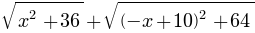

In [35]:
sympy.var("x")

L_lligadura = L.subs(y1, sympy.sqrt(6**2+x**2)).subs(y2, sympy.sqrt(8**2+(10-x)**2))
L_lligadura

* Calculem la primera derivada:

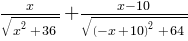

In [36]:
L_deriv = sp.diff(L_lligadura,x)
L_deriv

* Trobem l'extrem de la funció fent $\frac{dL}{dx} = 0$:

In [38]:
x_solucio = sympy.solve(L_deriv, x)
x_solucio

[30/7]

* Comprovem que és un mínim si $\frac{d^2L}{dx^2} > 0$:

In [40]:
print ("És un mínim? %s" % (sp.diff(L_lligadura, x, 2).subs(x,x_solucio[0]) > 0))

És un mínim? True


* Per tot això:

In [42]:
print ("La longitud de la corda més curta és %4.3fm" % L_lligadura.subs(x,x_solucio[0]))
print ("i toca el terra en un punt situat a %4.3fm de la torre de 6m d'alçada." % x_solucio[0])

La longitud de la corda més curta és 17.205m
i toca el terra en un punt situat a 4.286m de la torre de 6m d'alçada.


## 15.3.2 Integració

### 15.3.2.1 Integrals indefinides

`Sympy` permet fer integració simbòlica de funcions mitjançant la funció **`.integrate(`**`exp`**`,`**`var`**`)`**, que, en la seva forma més bàsica, rep com a arguments:

  * una `exp`ressió simbòlica a integrar i
  * la `var`iable sobre la que integrar.

In [43]:
import sympy as sp
sp.init_printing()
sp.var("x")

print ("Integrant x**2 + 5*x + 1")
sp.integrate(x**2 + 5*x + 1, x)

Integrant x**2 + 5*x + 1


In [44]:
print ("Integrant sin(x)*exp(x)")
sp.integrate(sp.sin(x)*sp.exp(x),x)

Integrant sin(x)*exp(x)



### 12.3.2.2 Integració respecte múltiples variables

Aquesta mateixa funció permet fer integrals múltiples, respecte diverses variables.

In [45]:
import sympy as sp
sp.init_printing()
sp.var("x")
sp.var("y")
funcio = x**2 * 5*sp.sin(y)
funcio

In [46]:
sp.integrate(funcio, x, y)

In [47]:
# que és el mateix que fer
sp.integrate(sp.integrate(funcio,x),y)

Fent integrals definides sobre més d'una variable es poden calcular volums i hipervolums (veurem un exercici més endavant)

### 15.3.2.3 Integrals definides

La mateixa funció `.integrate()` permet també calcular **integrals definides** indicant els límits d'integració. Per exemple la integral:

$$\int_0^\pi sin(x) dx = -cos(x)|_0^\pi = 2$$

s'implementa com:

In [48]:
import sympy as sp
sp.init_printing()

sp.var("x")

sp.integrate(sp.sin(x),(x,0,sp.pi))

Fixeu-vos que cal indicar la variable d´integració i els seus extrems com una tupla:
`(variable, extrem_inferior, extrem_superior)`

Es pot indicar també un límit d'integració infinit ($\infty$) amb el símbol `simpy.oo` . L'exemple següent implementa la integral:

$$\int_0^\infty e^{-x} dx = e^{-x} |_0^\infty = 1$$

In [49]:
import sympy as sp
sp.init_printing()

sp.var("x")

sp.integrate(sp.exp(-x),(x,0,sp.oo))

De forma similar es poden calcular integrals múltiples definides. Per exemple, la integral:

$$\int_0^\infty \int_0^\infty e^{-x^2 - y^2} dx dy = \pi$$

In [50]:
import sympy as sp
sp.init_printing()

sp.var("x")
sp.var("y")

sp.integrate(sp.exp(-x**2 - y**2), (x, -sp.oo, sp.oo), (y, -sp.oo, sp.oo))

**Atenció!**: Els límits d'integracio poden ser símbols, i el resultat s'expressa en funció d'ells. Per exemple:

$$\int_0^a sin(x) dx = -cos(a) + 1$$

In [51]:
import sympy as sp
sp.init_printing()

sp.var("x")
sp.var("a")

sp.integrate(sp.sin(x),(x,0,a))


Però compte, si el resultat simbòlic depèn del domini de definició del símbol, podem trobar **solucions definides a troços**. 

En l'exemple següent el resultat indica dues possibilitats per què la integral  $\int_{0}^{\infty} x^a e^{-x} dx$ no convergeix si la part real de $a$ no és $>1$

In [53]:
import sympy as sp
sp.init_printing()

sp.var("x")
sp.var("a")

sp.integrate(x**a*sp.exp(-x), (x, 0, sp.oo))

⎧ Γ(a + 1)    for -re(a) < 1
⎪                           
⎪∞                          
⎪⌠                          
⎨⎮  a  -x                   
⎪⎮ x ⋅ℯ   dx    otherwise   
⎪⌡                          
⎪0                          
⎩                           

### Exercici 15.3.3

___

>  * Demostreu que l'àrea $A_{elipse}$ d´una el.lipse $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1 $ val:
>>    $$ A_{elipse} = \pi \ ab$$
>  * Demostreu que l'àrea $A_{cercle}$ d´un cercle de radi $r$ val:
>>    $$ A_{cercle} = \pi \ r^2$$

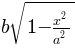

In [54]:
#comencem per l'el·lipse
import sympy as sp
sp.init_printing()

sp.var("x")
sp.var("a")
sp.var("b")

semi_elipse = b*sp.sqrt(1-(x/a)**2)
semi_elipse

In [56]:
sp.integrate(semi_elipse, x) #mirem si existeix la primitiva

  ⎛⎧           ⎛x⎞                                                         ⎞
  ⎜⎪  ⅈ⋅a⋅acosh⎜─⎟                                  3              │ 2│    ⎟
  ⎜⎪           ⎝a⎠          ⅈ⋅x                  ⅈ⋅x               │x │    ⎟
  ⎜⎪- ──────────── - ───────────────── + ────────────────────  for │──│ > 1⎟
  ⎜⎪       2                 _________              _________      │ 2│    ⎟
  ⎜⎪                        ╱       2              ╱       2       │a │    ⎟
  ⎜⎪                       ╱       x        2     ╱       x                ⎟
  ⎜⎪                 2⋅   ╱   -1 + ──    2⋅a ⋅   ╱   -1 + ──               ⎟
  ⎜⎪                     ╱          2           ╱          2               ⎟
b⋅⎜⎨                   ╲╱          a          ╲╱          a                ⎟
  ⎜⎪                                                                       ⎟
  ⎜⎪                                  ________                             ⎟
  ⎜⎪                                 ╱      2                              ⎟

In [57]:
area_elipse = 4 * sp.integrate(semi_elipse, (x, 0, a))  #integrem un quadrant de l'elipse (mitja semielipse)
area_elipse

In [58]:
sp.var("r")  #el cercle és un cas particular de l'el·lipse
area_cercle = area_elipse.subs(a,r).subs(b,r)
area_cercle

### Exercici 15.3.4

___

>  * Tracteu de calcular amb `sympy` el perímetre $P_{elipse}$ d´una el.lipse $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1.$
>  * Tracteu de demostrar amb `sympy` que el perímetre $P_{cercle}$ d´un cercle de radi $r$ val:
>>    $$ P_{cercle} = 2 \ \pi \ r$$

> _Ajuda: La longitud $L$ d'una funció arbitrària $f(x)$ en l'interval $x \in [a,b]$ es pot calcular com
$$L = \int_a^b \sqrt{1+\left(\frac{df}{dx}\right)^2} \ dx$$_

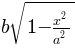

In [59]:
import sympy as sp
sp.init_printing()

sp.var("x")
sp.var("a")
sp.var("b")

semi_elipse = b*sp.sqrt(1-(x/a)**2)
semi_elipse

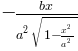

In [60]:
deriv_semi_elipse = sp.diff(semi_elipse,x)
deriv_semi_elipse


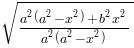

In [61]:
funcio_longitud = sp.sqrt(1+deriv_semi_elipse**2).simplify()
funcio_longitud

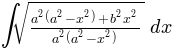

In [62]:
sp.integrate(funcio_longitud,x) #intentem buscar primitiva simple: no existeix

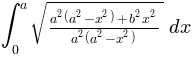

In [63]:
sp.integrate(funcio_longitud, (x, 0, a)) #intentem buscar integral definida d'un quadrant: tampoc!

* `sympy` no pot avaluar la longitud d'una el·lipse!!

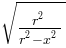

In [64]:
funcio_longitud_cercle = funcio_longitud.subs(a,r).subs(b,r).simplify() #busquem solució pel cas del cercle (més simple)
funcio_longitud_cercle

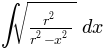

In [65]:
sp.integrate(funcio_longitud_cercle,x) #tampoc trobem primitiva

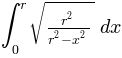

In [66]:
sp.integrate(funcio_longitud_cercle, (x, 0, r)) #ni integral definida a un quadrant!!

* `sympy` tampoc sap avaluar la longitud d'un cercle!!

### Exercici 15.3.4

___

>  * Calculeu el volum $V_{paraboloide}$ tancat pel paraboloide de revolució definit per $z = h^2 -(x^2+y^2)$ en l'interval $x,y\in[-h,+h]$

In [67]:
import sympy as sp
sp.init_printing()

sp.var("x")
sp.var("y")
sp.var("h")

parab = h**2 - (x**2 + y **2)
parab

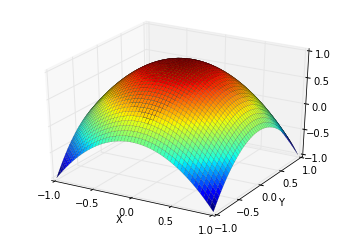

In [64]:
#mostrem corba per entendre que estem fent...
from sympy.plotting import plot3d
plot3d(parab.subs(h, 1), (x,-1,1), (y,-1,1),xlabel= 'X',ylabel= 'Y',zlabel= 'Z' )

In [68]:
sp.integrate(parab, (x, -h, h), (y, -h, h))  #integrem les dues variables en el domini demanat

### 15.3.2.4 Integrals com a símbols

En cas que la integral no es vulgui avaluar, obtenint la funció o el valor numèric corresponent, es pot usar `Integral()` que retorna la integral com una expressió simbòlica de `sympy`. Posteriorment la integral es pot avaluar usant `.doit()`

Per exemple, en el cas d'integració definida:

In [70]:
import sympy as sp
sp.init_printing()

sp.var("x")

resultat = sp.Integral(sp.exp(-x**2 - y**2), (x, -sp.oo, sp.oo), (y, -sp.oo, sp.oo))
resultat, resultat.doit()

⎛∞  ∞                     ⎞
⎜⌠  ⌠                     ⎟
⎜⎮  ⎮      2    2         ⎟
⎜⎮  ⎮   - x  - y          ⎟
⎜⎮  ⎮  ℯ          dx dy, π⎟
⎜⌡  ⌡                     ⎟
⎝-∞ -∞                    ⎠

I un exemple en el cas d'integració simbòlica:

In [72]:
import sympy as sp
sp.init_printing()

sp.var("x")

resultat = sp.Integral((x**4 + x**2*sp.exp(x) - x**2 - 2*x*sp.exp(x) - 2*x - sp.exp(x))*sp.exp(x)/((x - 1)**2*(x + 1)**2*(sp.exp(x) + 1)), x)
resultat, resultat.doit()

⎛⌠                                                                  ⎞
⎜⎮ ⎛ 4    2  x    2        x          x⎞  x                      x  ⎟
⎜⎮ ⎝x  + x ⋅ℯ  - x  - 2⋅x⋅ℯ  - 2⋅x - ℯ ⎠⋅ℯ         ⎛ x    ⎞     ℯ   ⎟
⎜⎮ ──────────────────────────────────────── dx, log⎝ℯ  + 1⎠ + ──────⎟
⎜⎮               2        2 ⎛ x    ⎞                           2    ⎟
⎜⎮        (x - 1) ⋅(x + 1) ⋅⎝ℯ  + 1⎠                          x  - 1⎟
⎝⌡                                                                  ⎠